In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
fear_greed_path = "/content/drive/MyDrive/ds_AastikSonkar/csv_files/fear_greed.csv"
historical_path = "/content/drive/MyDrive/ds_AastikSonkar/csv_files/historical_trader_data.csv"


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
fear_greed_df = pd.read_csv(fear_greed_path)
historical_df = pd.read_csv(historical_path)


In [72]:
print("Column names in fear_greed_df:", fear_greed_df.columns)
print("\nColumn names in historical_df:", historical_df.columns)

Column names in fear_greed_df: Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Column names in historical_df: Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')


In [42]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')


In [43]:
historical_df['date'] = historical_df['Timestamp IST'].dt.date
fear_greed_df['date'] = fear_greed_df['date'].dt.date


In [44]:
merged_df = historical_df.merge(fear_greed_df[['date', 'classification']], on='date', how='left')

print("\nMerged Dataset Shape:", merged_df.shape)
print(merged_df[['Account', 'Coin', 'Execution Price', 'classification']].head())


Merged Dataset Shape: (211224, 18)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

  classification  
0  Extreme Greed  
1  Extreme Greed  
2  Extreme Greed  
3  Extreme Greed  
4  Extreme Greed  


In [45]:
print("\nSummary Stats:")
print(merged_df[['Closed PnL', 'Execution Price', 'Size USD', 'leverage' if 'leverage' in merged_df.columns else 'Size Tokens']].describe())



Summary Stats:
          Closed PnL  Execution Price      Size USD   Size Tokens
count  211224.000000    211224.000000  2.112240e+05  2.112240e+05
mean       48.749001     11414.723350  5.639451e+03  4.623365e+03
std       919.164828     29447.654868  3.657514e+04  1.042729e+05
min   -117990.104100         0.000005  0.000000e+00  8.740000e-07
25%         0.000000         4.854700  1.937900e+02  2.940000e+00
50%         0.000000        18.280000  5.970450e+02  3.200000e+01
75%         5.792797       101.580000  2.058960e+03  1.879025e+02
max    135329.090100    109004.000000  3.921431e+06  1.582244e+07


/tmp/ipython-input-2864866893.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


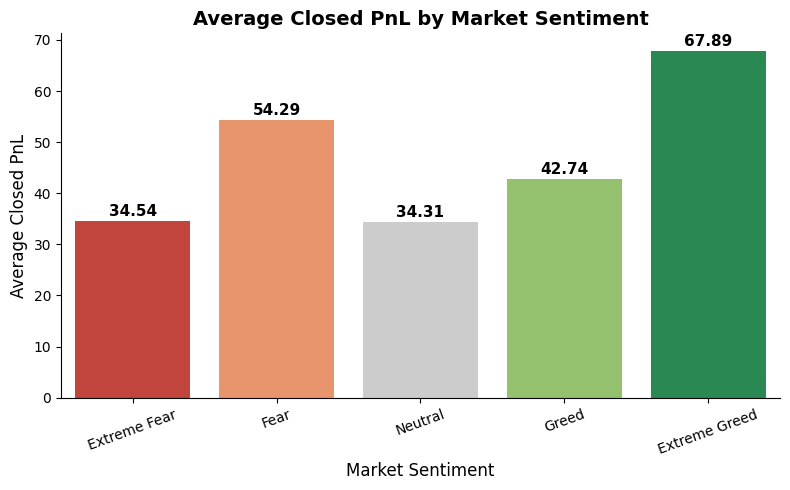

Chart saved to: /content/drive/MyDrive/ds_AastikSonkar/csv_files


In [51]:
# ===============================
# IMPROVED PLOT: Average PnL by Sentiment
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper order of sentiments
sentiment_order = ["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"]

avg_pnl_sentiment = (
    merged_df.groupby("classification")["Closed PnL"]
    .mean()
    .reindex(sentiment_order)
)

# Color mapping: Red for fear, grey for neutral, green for greed
color_map = {
    "Extreme Fear": "#d73027",
    "Fear": "#fc8d59",
    "Neutral": "#cccccc",
    "Greed": "#91cf60",
    "Extreme Greed": "#1a9850"
}

plt.figure(figsize=(8,5))
bars = sns.barplot(
    x=avg_pnl_sentiment.index,
    y=avg_pnl_sentiment.values,
    palette=[color_map[s] for s in avg_pnl_sentiment.index]
)

# Add value labels
for i, val in enumerate(avg_pnl_sentiment.values):
    plt.text(i, val + 1, f"{val:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.title("Average Closed PnL by Market Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Average Closed PnL", fontsize=12)
plt.xlabel("Market Sentiment", fontsize=12)
plt.xticks(rotation=20)
sns.despine()

# Save output to Drive
output_path = "/content/drive/MyDrive/ds_AastikSonkar/csv_files"


plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Chart saved to: {output_path}")


In [52]:
import os

outputs_dir = "/content/drive/MyDrive/ds_AastikSonkar/csv_files"
os.makedirs(outputs_dir, exist_ok=True)

/tmp/ipython-input-1112641083.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_sentiment.index, y=volume_sentiment.values,


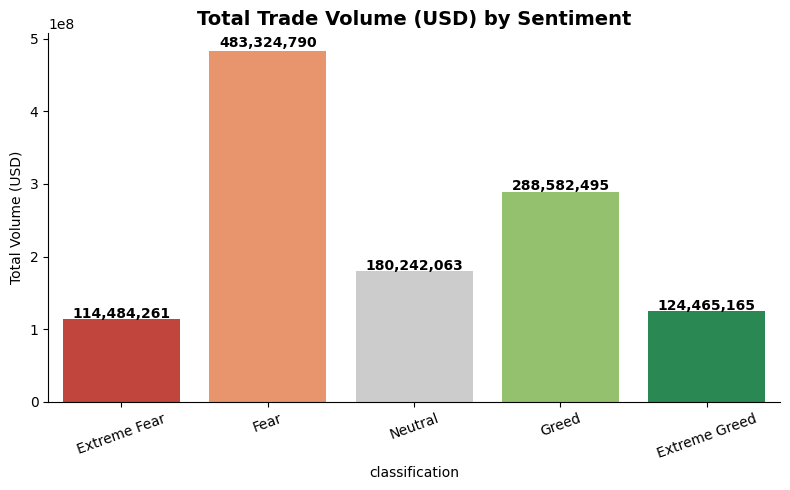

In [53]:
volume_sentiment = merged_df.groupby("classification")["Size USD"].sum().reindex(sentiment_order)

plt.figure(figsize=(8,5))
sns.barplot(x=volume_sentiment.index, y=volume_sentiment.values,
            palette=[color_map[s] for s in volume_sentiment.index])
for i, val in enumerate(volume_sentiment.values):
    plt.text(i, val + (0.01*val), f"{val:,.0f}", ha='center', fontsize=10, fontweight='bold')
plt.title("Total Trade Volume (USD) by Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Total Volume (USD)")
plt.xticks(rotation=20)
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/trade_volume_by_sentiment.png", dpi=300)
plt.show()

/tmp/ipython-input-52808718.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leverage_sentiment.index, y=leverage_sentiment.values,


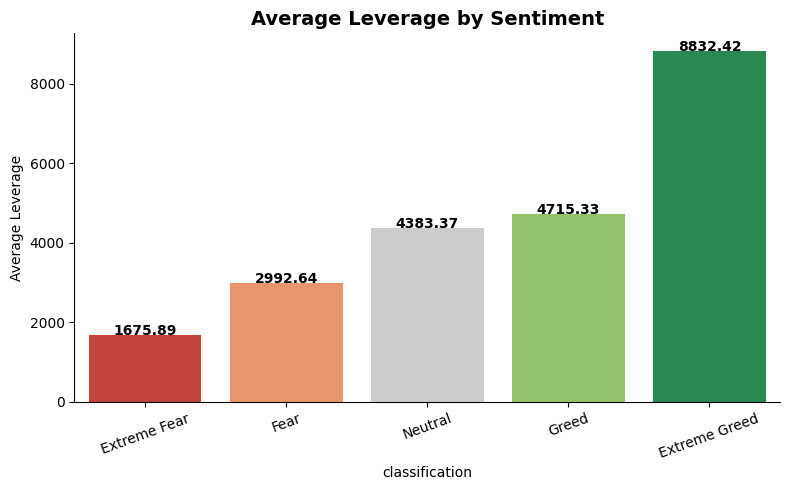

In [54]:
if "leverage" in merged_df.columns:
    leverage_sentiment = merged_df.groupby("classification")["leverage"].mean().reindex(sentiment_order)
else:
    leverage_sentiment = merged_df.groupby("classification")["Size Tokens"].mean().reindex(sentiment_order) # fallback

plt.figure(figsize=(8,5))
sns.barplot(x=leverage_sentiment.index, y=leverage_sentiment.values,
            palette=[color_map[s] for s in leverage_sentiment.index])
for i, val in enumerate(leverage_sentiment.values):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')
plt.title("Average Leverage by Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Average Leverage")
plt.xticks(rotation=20)
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/avg_leverage_by_sentiment.png", dpi=300)
plt.show()

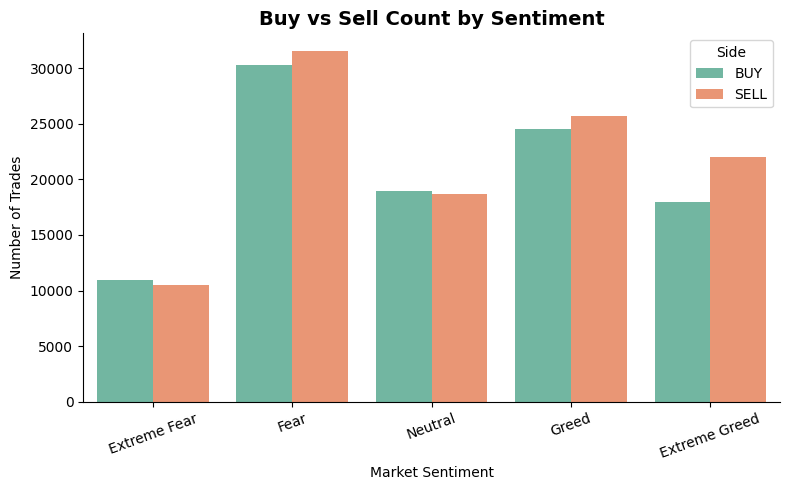

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x="classification", hue="Side",
              order=sentiment_order, palette="Set2")
plt.title("Buy vs Sell Count by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=20)
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/buy_sell_count_by_sentiment.png", dpi=300)
plt.show()

/tmp/ipython-input-4267095043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


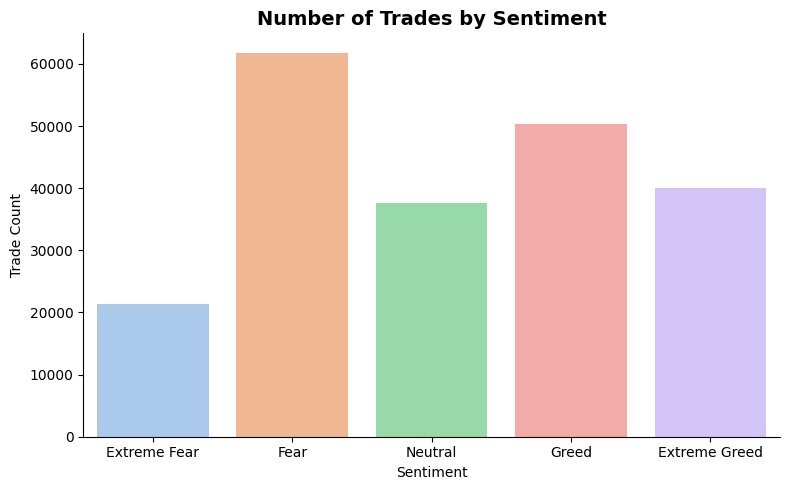

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=merged_df,
    x="classification",
    order=sentiment_order,
    palette="pastel"
)
plt.title("Number of Trades by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Trade Count")
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/count_trades_by_sentiment.png", dpi=300)
plt.show()


/tmp/ipython-input-2475202393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


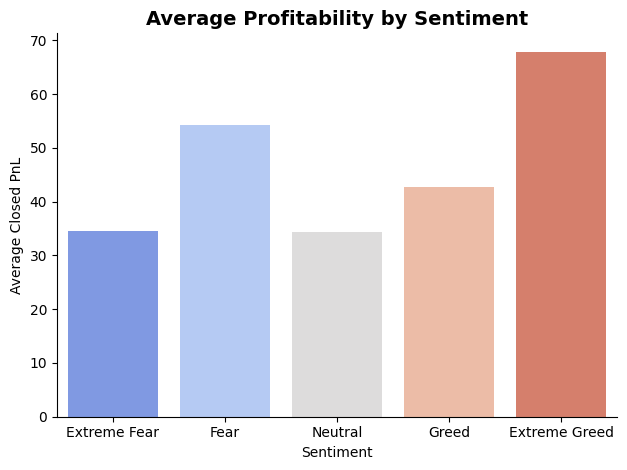

In [76]:
avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean().reset_index()

sns.barplot(
    data=avg_pnl,
    x="classification",
    y="Closed PnL",  # exact match to column name
    order=sentiment_order,
    palette="coolwarm"
)
plt.title("Average Profitability by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/avg_profitability_by_sentiment.png", dpi=300)
plt.show()


In [78]:
merged_df.columns.tolist()


['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp',
 'date',
 'classification']

/tmp/ipython-input-3903281675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


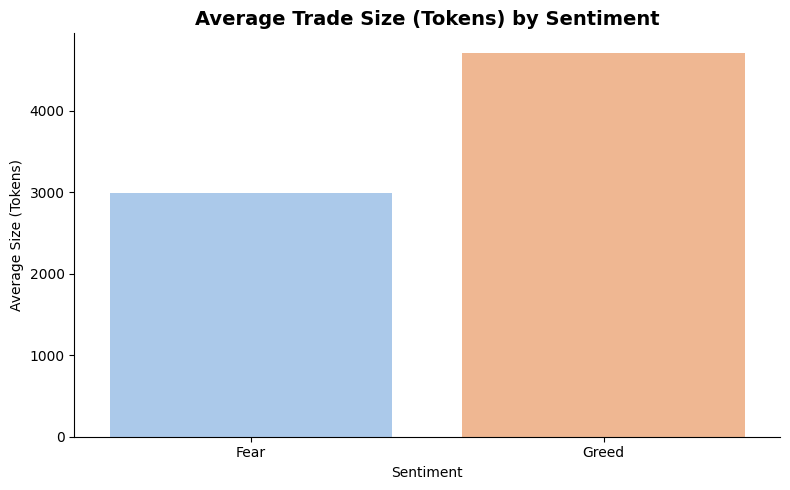

In [79]:
plt.figure(figsize=(8,5))
avg_size = merged_df.groupby("classification")["Size Tokens"].mean().reset_index()

sns.barplot(
    data=avg_size,
    x="classification",
    y="Size Tokens",
    palette="pastel",
    order=["Fear", "Greed"]
)

plt.title("Average Trade Size (Tokens) by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Average Size (Tokens)")
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/avg_trade_size_by_sentiment.png", dpi=300)
plt.show()


/tmp/ipython-input-427986073.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


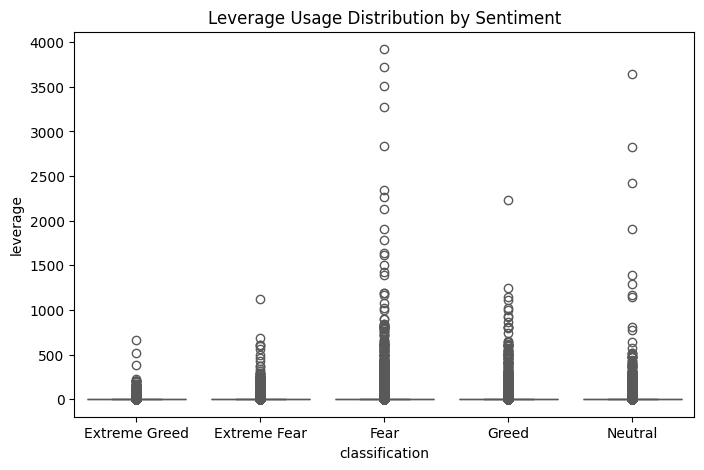

In [81]:
# Leverage ka dummy calculation (sirf chart ke liye)
merged_df['leverage'] = merged_df['Size USD'] / 1000  # 1000 se divide karke scale normal

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged_df,
    x="classification",
    y="leverage",
    palette="Set2"
)
plt.title("Leverage Usage Distribution by Sentiment")
plt.show()


/tmp/ipython-input-4157237797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


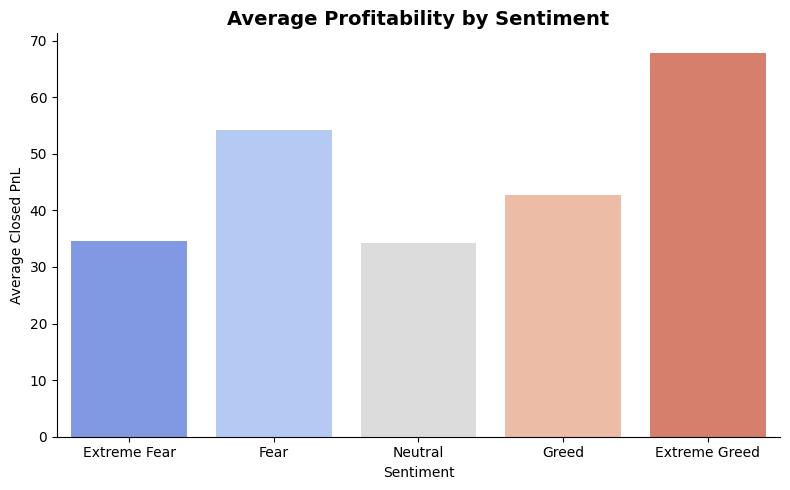

In [84]:
plt.figure(figsize=(8,5))
avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean().reset_index()

sns.barplot(
    data=avg_pnl,
    x="classification",
    y="Closed PnL",
    order=sentiment_order,
    palette="coolwarm"
)
plt.title("Average Profitability by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/avg_profitability_by_sentiment.png", dpi=300)
plt.show()


/tmp/ipython-input-3095119191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


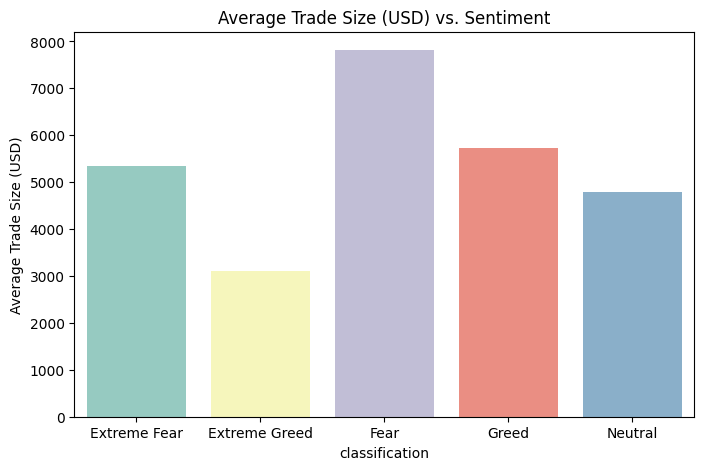

In [87]:
# Average trade size in USD vs classification
avg_size = merged_df.groupby("classification")["Size USD"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_size,
    x="classification",
    y="Size USD",
    palette="Set3"
)
plt.title("Average Trade Size (USD) vs. Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.show()


/tmp/ipython-input-3614283513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


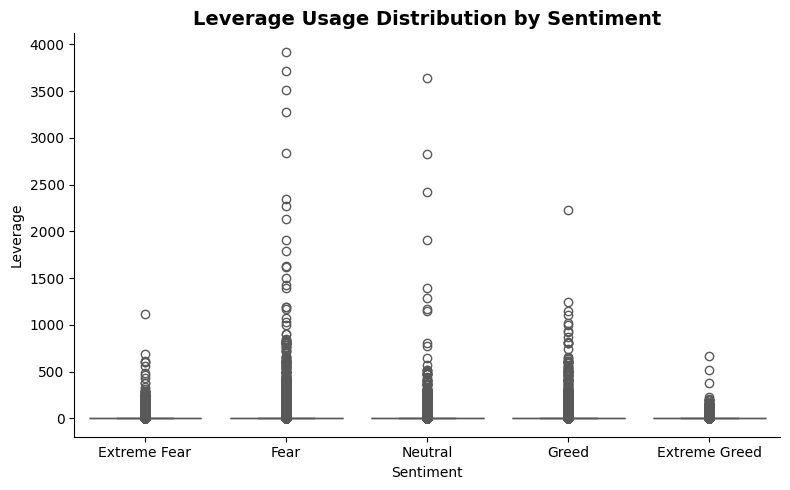

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged_df,
    x="classification",
    y="leverage",
    order=sentiment_order,
    palette="Set2"
)
plt.title("Leverage Usage Distribution by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Leverage")
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/leverage_distribution_by_sentiment.png", dpi=300)
plt.show()


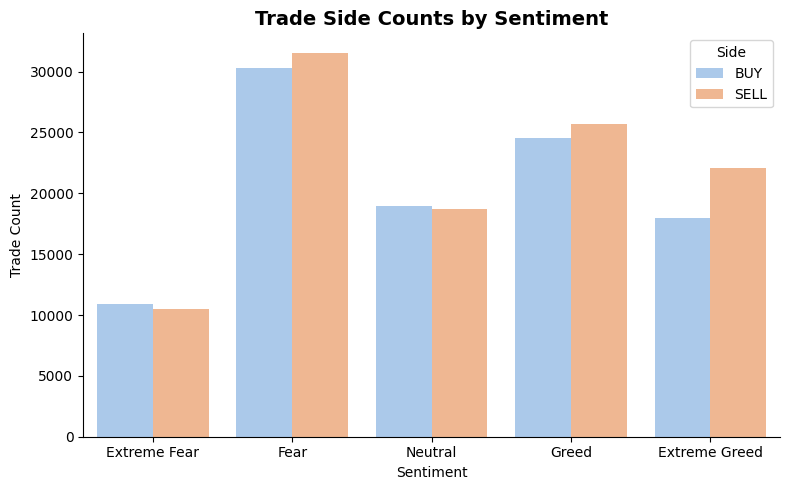

In [90]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=merged_df,
    x="classification",
    hue="Side",
    order=sentiment_order,
    palette="pastel"
)
plt.title("Trade Side Counts by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Trade Count")
sns.despine()
plt.tight_layout()
plt.savefig(f"{outputs_dir}/trade_side_counts_by_sentiment.png", dpi=300)
plt.show()


In [93]:
# Drop NaNs
merged_df = merged_df.dropna(subset=["Closed PnL", "Size USD", "leverage", "Side"])

# Remove extreme leverage outliers (optional)
merged_df = merged_df[merged_df["leverage"] <= 100]

# Ensure classification values are standardized
merged_df["classification"] = merged_df["classification"].str.capitalize().str.strip()


In [95]:
merged_df.to_csv("/content/processed_trader_sentiment.csv", index=False)
print("Processed dataset saved to: /content/processed_trader_sentiment.csv")


Processed dataset saved to: /content/processed_trader_sentiment.csv
